In [2]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
from IPython.display import Image
from prob5_AE import AE
from torchvision import datasets

Problem 4

sample input data

In [3]:
input = torch.randn(1,50,50)

In [4]:
m = nn.Conv2d(1, 1, 4, stride=1, padding = 1)
output = m(input)
#dimensions of output
print(output.shape)

torch.Size([1, 49, 49])


In [5]:
m = nn.Conv2d(1, 1, 8, stride=5, padding = 0)
output = m(input)
print(output.shape)

torch.Size([1, 9, 9])


In [6]:
#max-pooling
m = nn.MaxPool2d(kernel_size= 10, stride=2, padding = 2)
output = m(input)
print(output.shape)

torch.Size([1, 23, 23])


In [7]:
#max-pooling
m = nn.MaxPool2d(kernel_size= 2, stride=1, padding = 0)
output = m(input)
print(output.shape)

torch.Size([1, 49, 49])


Problem 4.2

after runnign the code we have 

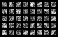

In [8]:
#show prob4_CNN.png
Image(filename='prob4_CNN.png', width=800)

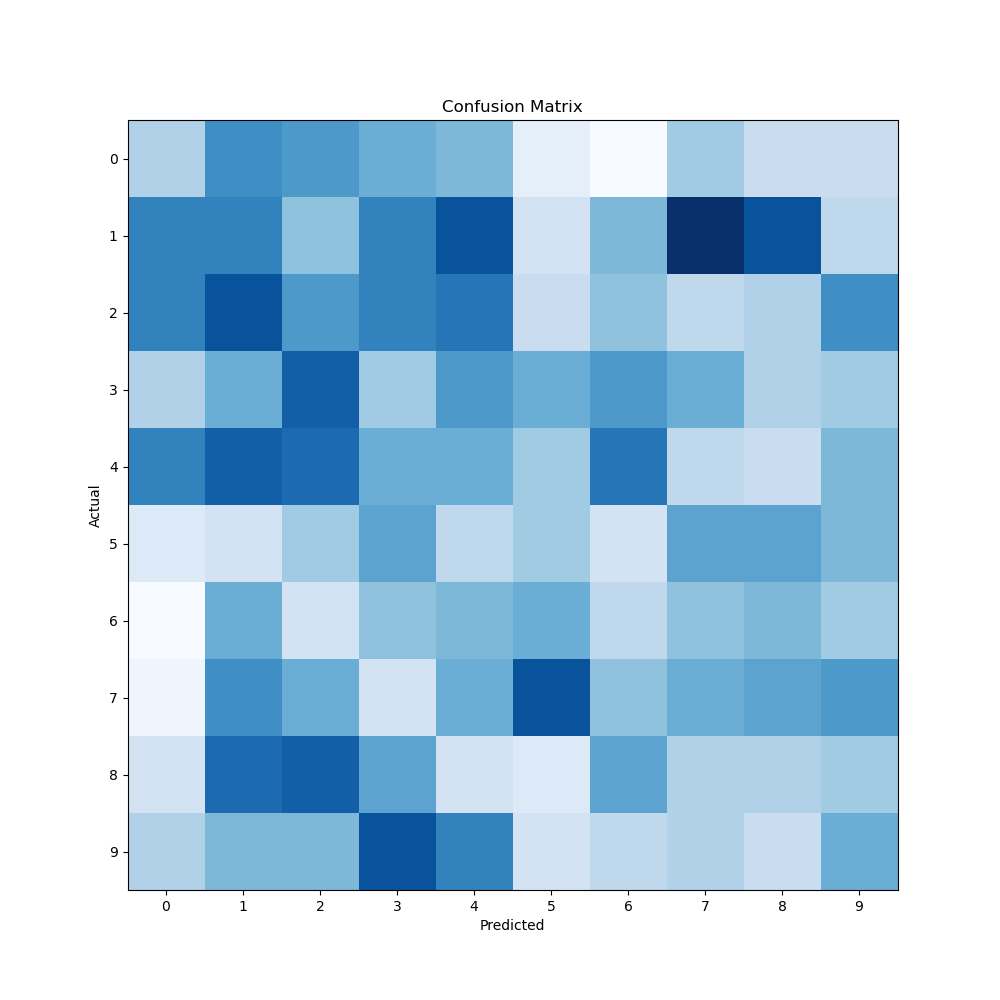

In [9]:
Image(filename='prob4_confusion_matrix.png', width=800)

1 and 7 are confused, which makes sense. 9 and 3 are confused, which makes sense.

Problem 5

Problem 5.1
1) In a classical auto encoder, bow tie architercutre the middle layer is called the bottlenec. The dimension of the bottleneck is chosen to be drastically different from the input and output layer. This way it is impossible for the NN to simply copy the input to the output.
2) By introducing regularisation/corruption, we introduce a preference for some solution compared to others. Typically this prohibits the NN from simply copying the input to the output. 
3) For an input sample X, we can perturb it to $\tidle{X}$. We train the NN to compare the output of X to $\tidle{X}$. This way the NN learns to ignore the perturbations and focus on the important features of the input. 

Problem 5.2
We can add gaussian noise to a sample to corrupt it.

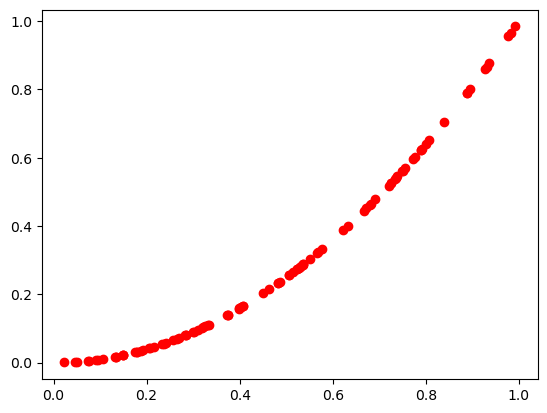

In [10]:
#generate 1000 random numbers uniformly distributed between 0 and 1
x = np.random.rand(100)
y = x**2

plt.plot(x,y, 'ro')

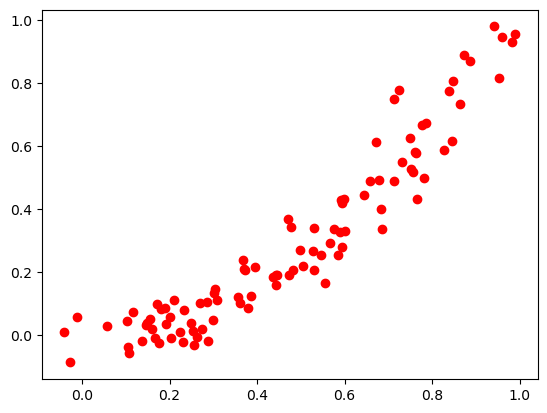

In [11]:
#add gaussian noise to x and y
x_corrupt = x + np.random.randn(100)*0.05
y_corrupt = y + np.random.randn(100)*0.05

plt.plot(x_corrupt,y_corrupt, 'ro')

Problem 5.3
It can mathematically be shown that an autoencoder with a single linear layer is equivalent to PCA. This is because PCA is a linear transformation that tries to find the directions of maximum variance in the data. The autoencoder with a single linear layer tries to find a subspace which preserves as much information as possible, s.t. the reconstruction loss is reduced.

Problem 5.4

For 

In [26]:
model = AE()
model.load_state_dict(torch.load('mnist_ae.pt'))
#model.eval()

<All keys matched successfully>

In [27]:
model.encoder(torch.randn(1,784))

tensor([[0.7912, 1.9430]], grad_fn=<AddmmBackward0>)

In [33]:
mnist_testset = datasets.MNIST(root='./data', train=False, download=True, transform=None)

ntest = 2000
test_data = (mnist_testset.data.to(dtype=torch.float32)[:ntest]/255).view(-1, 1, 28, 28)
test_labels = mnist_testset.targets.to(dtype=torch.long)[:ntest]

test_data = test_data.reshape(-1, 28*28)
embedded = model.encoder(test_data)

In [35]:
embedded = embedded.detach().numpy()

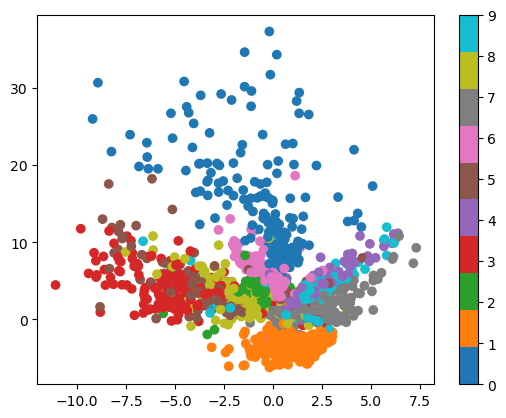

In [36]:
#plot embedded data
plt.figure()
plt.scatter(embedded[:,0], embedded[:,1], c=test_labels, cmap='tab10')
plt.colorbar()
plt.show()

We see that 5 and 3 are harder to seperate which agrees with our domain knowledge. 7 is similar to 9.

Problem 6